<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/Restaurant_Reviews_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Data preprocessing
Dataset link : https://www.kaggle.com/datasets/akram24/restaurant-reviews

## Importing the libraries and dataset :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) # tsv format, must be truncated at '\t' , eliminating the quotes presented in the dataset

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data exploration

In [5]:
dataset.shape

(1000, 2)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [9]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Dealing with missing values


In [10]:
dataset.isnull().values.any()

False

## Countplot

<Axes: xlabel='Liked', ylabel='count'>

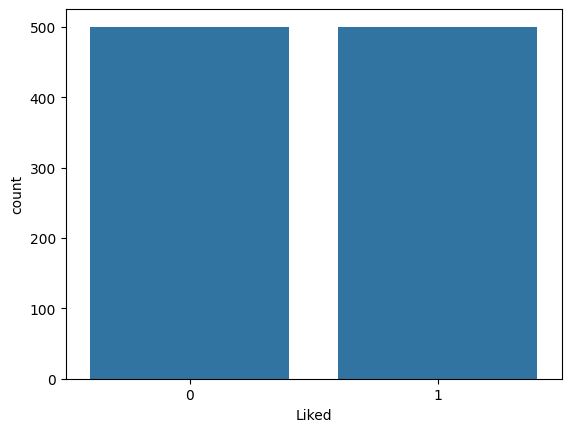

In [15]:
sns.countplot(x=dataset['Liked']) # target variable counts

In [16]:
# positive reviews
(dataset.Liked == 1).sum()

500

In [18]:
# negative reviews
(dataset.Liked == 0).sum()

500

## Length of messages

In [19]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [20]:
dataset['Length'] = dataset['Review'].apply(len) # Calculating the length of each review message,  by applying the len function on all the text in each row

<Axes: ylabel='Frequency'>

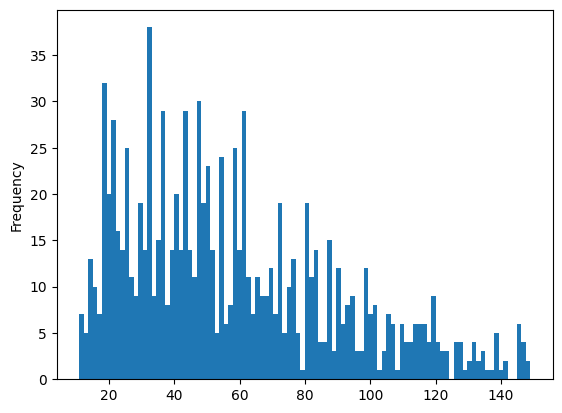

In [22]:
# histogram
dataset['Length'].plot(bins = 100, kind='hist') # plotting the average length of the messages

In [24]:
dataset.Length.describe()

,Length
count,1000.000000
mean,58.315000
std,32.360052
min,11.000000
25%,33.000000
50%,51.000000
75%,80.000000
max,149.000000


In [25]:
# Longest message
dataset[dataset['Length'] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [26]:
# Shortest message
dataset[dataset['Length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

In [27]:
positive = dataset[dataset['Liked'] ==1]

In [28]:
negative = dataset[dataset['Liked'] ==0]

In [29]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [30]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


## Cleaning text

In [32]:
import re # regular expression library
import nltk # natural language processing library

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
corpus = []

for i in range(0,1000):
  review = re.sub('[^a-zA-Z]', ' ',dataset['Review'][i]) # replacing the text, by the use of the regular expressions |  replacing anything else that does not start with a letter , on each index of rows of the given dataset
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not') # remove the word from being used as a stopword -> phrases which include the word will be included as a whole
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)] # single row for loop
  review = ' '.join(review)
  corpus.append(review)

In [36]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [37]:
len(corpus)

1000

## Creating the Bag of Words Model

""" We need to create a sparse matrix , in order to verify the recurrence of the given word.


 """

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

In [41]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [40]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1] # liked column

In [42]:
x.shape

(1000, 1500)

In [43]:
y.shape

(1000,)

## Splitting the dataset

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [45]:
x_train.shape

(800, 1500)

In [46]:
y_train.shape

(800,)

In [47]:
x_test.shape

(200, 1500)

In [48]:
y_test.shape

(200,)

# Part 2 : Model Building

## 1) Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [50]:
y_pred = classifier_nb.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [53]:
acc = accuracy_score(y_test, y_pred)
print(acc * 100)

67.5


In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48 51]
 [14 87]]


## 2) XGBoost Classifier

In [55]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred = classifier_xgb.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(acc * 100)

78.0


In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[89 10]
 [34 67]]


# Part 3 : Final Model(XGBoost Classifier)


In [59]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred = classifier.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(acc * 100)

78.0


In [62]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[89 10]
 [34 67]]
